<a href="https://colab.research.google.com/github/syedzada077/DL_Assignment_1/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/sports/sports.csv'  # Change this to your CSV file path
df = pd.read_csv(data_path)

In [4]:
df.head()

,text,time,upvote,flair,sport,phase,category,context,extracted_text,sentiment
0,r/nfl's annual crash reddit day.,1.486332e+09,731.0,:Ravens: Ravens,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,r/nfl's annual crash reddit day.,neutral
1,Fuck the people that don't pay attention to fo...,1.486334e+09,488.0,NaN,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,Fuck the people that don't pay attention to fo...,negative
2,I'M FUCKING SCARED. FUCK.,1.486331e+09,217.0,:Falcons: Falcons,Football,1,1U,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,I'M FUCKING SCARED. FUCK.,negative
3,[deleted],1.486331e+09,637.0,NaN,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,[deleted],neutral
4,"Last game of the season. Gentleman, it has bee...",1.486331e+09,242.0,:Eagles: Eagles,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,Last game of the season. Gentleman,negative


In [5]:
text_data = df['text'].astype(str)
sentiment_labels = df['sentiment']

In [6]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(sentiment_labels)

In [7]:
tokenizer = Tokenizer(num_words=5000)  # Limit to 5000 words
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [8]:
# Pad sequences to ensure uniform input size
max_length = 100  # Define max length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [9]:
# Step 4: Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, encoded_labels, test_size=0.2, random_state=42, shuffle=True
)

In [10]:
# Check the size of the training and testing sets
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 50169
Testing data size: 12543


In [11]:
# Define the CNN model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))  # Embedding layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # Pooling layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # Pooling layer
model.add(Flatten())  # Flatten the output
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))  # Output layer for classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
epochs = 5  # Number of iterations/epochs (start small, increase if needed)
batch_size = 32  # Batch size

In [16]:
# Optional: Save the model after every epoch using ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Change the filepath to end with '.keras' instead of '.h5'
checkpoint = ModelCheckpoint('/content/drive/MyDrive/cnn_model.keras', save_best_only=True, monitor='val_loss')

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint]
)

Epoch 1/5
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.6132 - loss: 0.8900 - val_accuracy: 0.7400 - val_loss: 0.6839
Epoch 2/5
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7588 - loss: 0.6510 - val_accuracy: 0.7472 - val_loss: 0.6686
Epoch 3/5
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7839 - loss: 0.5716 - val_accuracy: 0.7426 - val_loss: 0.6960
Epoch 4/5
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8178 - loss: 0.4843 - val_accuracy: 0.7263 - val_loss: 0.7747
Epoch 5/5
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.8500 - loss: 0.4041 - val_accuracy: 0.7138 - val_loss: 0.8923


In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7057 - loss: 0.9281
Test Accuracy: 71.38%


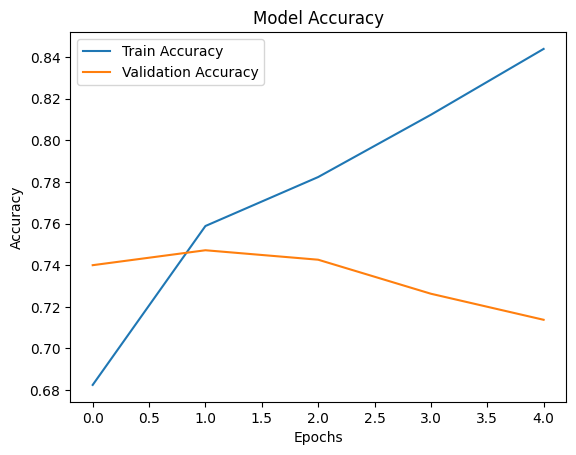

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [20]:
# Predict sentiments for the entire dataset
all_sequences = tokenizer.texts_to_sequences(df['text'].astype(str))
all_padded_sequences = pad_sequences(all_sequences, maxlen=max_length)

# Make predictions
all_predictions = model.predict(all_padded_sequences)
predicted_classes = np.argmax(all_predictions, axis=1)

# Decode the predicted sentiments
predicted_sentiments = label_encoder.inverse_transform(predicted_classes)

# Create a final DataFrame with original texts and predicted sentiments
results_df = pd.DataFrame({
    'Text': df['text'],
    'Predicted Sentiment': predicted_sentiments
})

# Display the first few rows of the final table
print(results_df.head())

1960/1960 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step
                                                Text Predicted Sentiment
0                   r/nfl's annual crash reddit day.             neutral
1  Fuck the people that don't pay attention to fo...            negative
2                          I'M FUCKING SCARED. FUCK.            negative
3                                          [deleted]             neutral
4  Last game of the season. Gentleman, it has bee...            negative
